# Allen Institute Visual Behavior 2P dataset overview
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
##### In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.


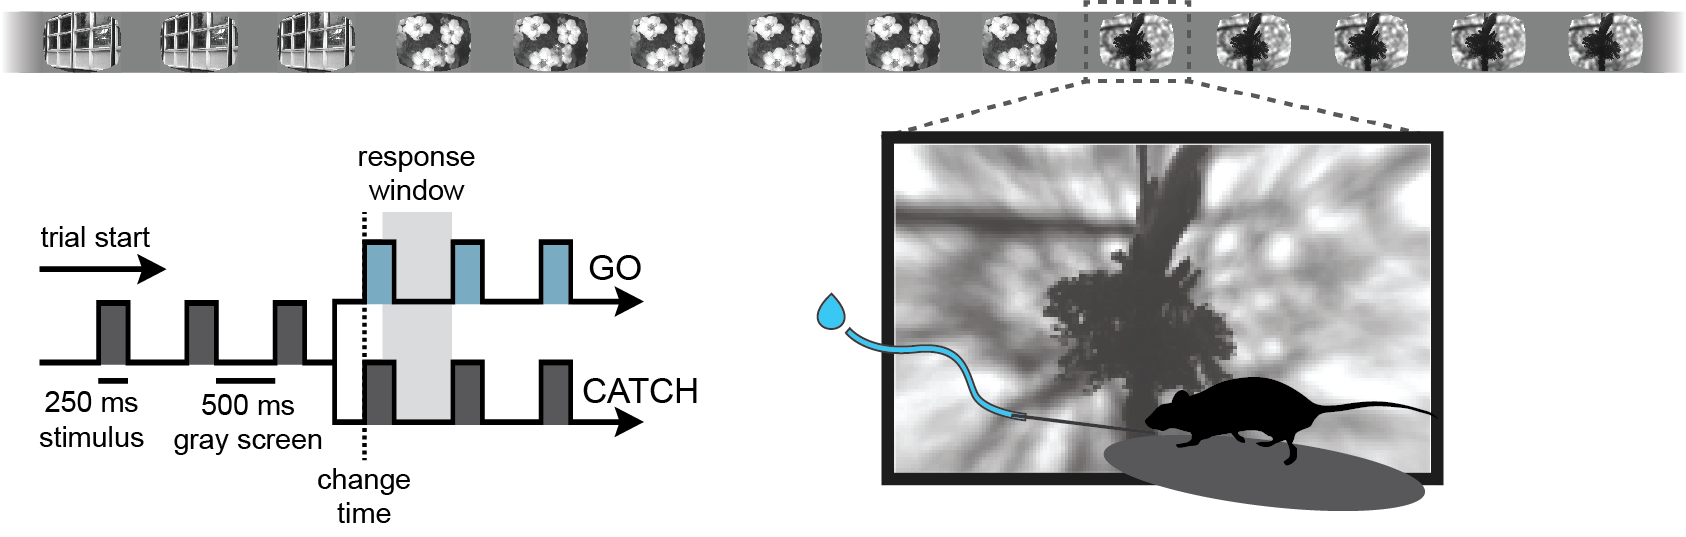

##### In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images.
##### During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.


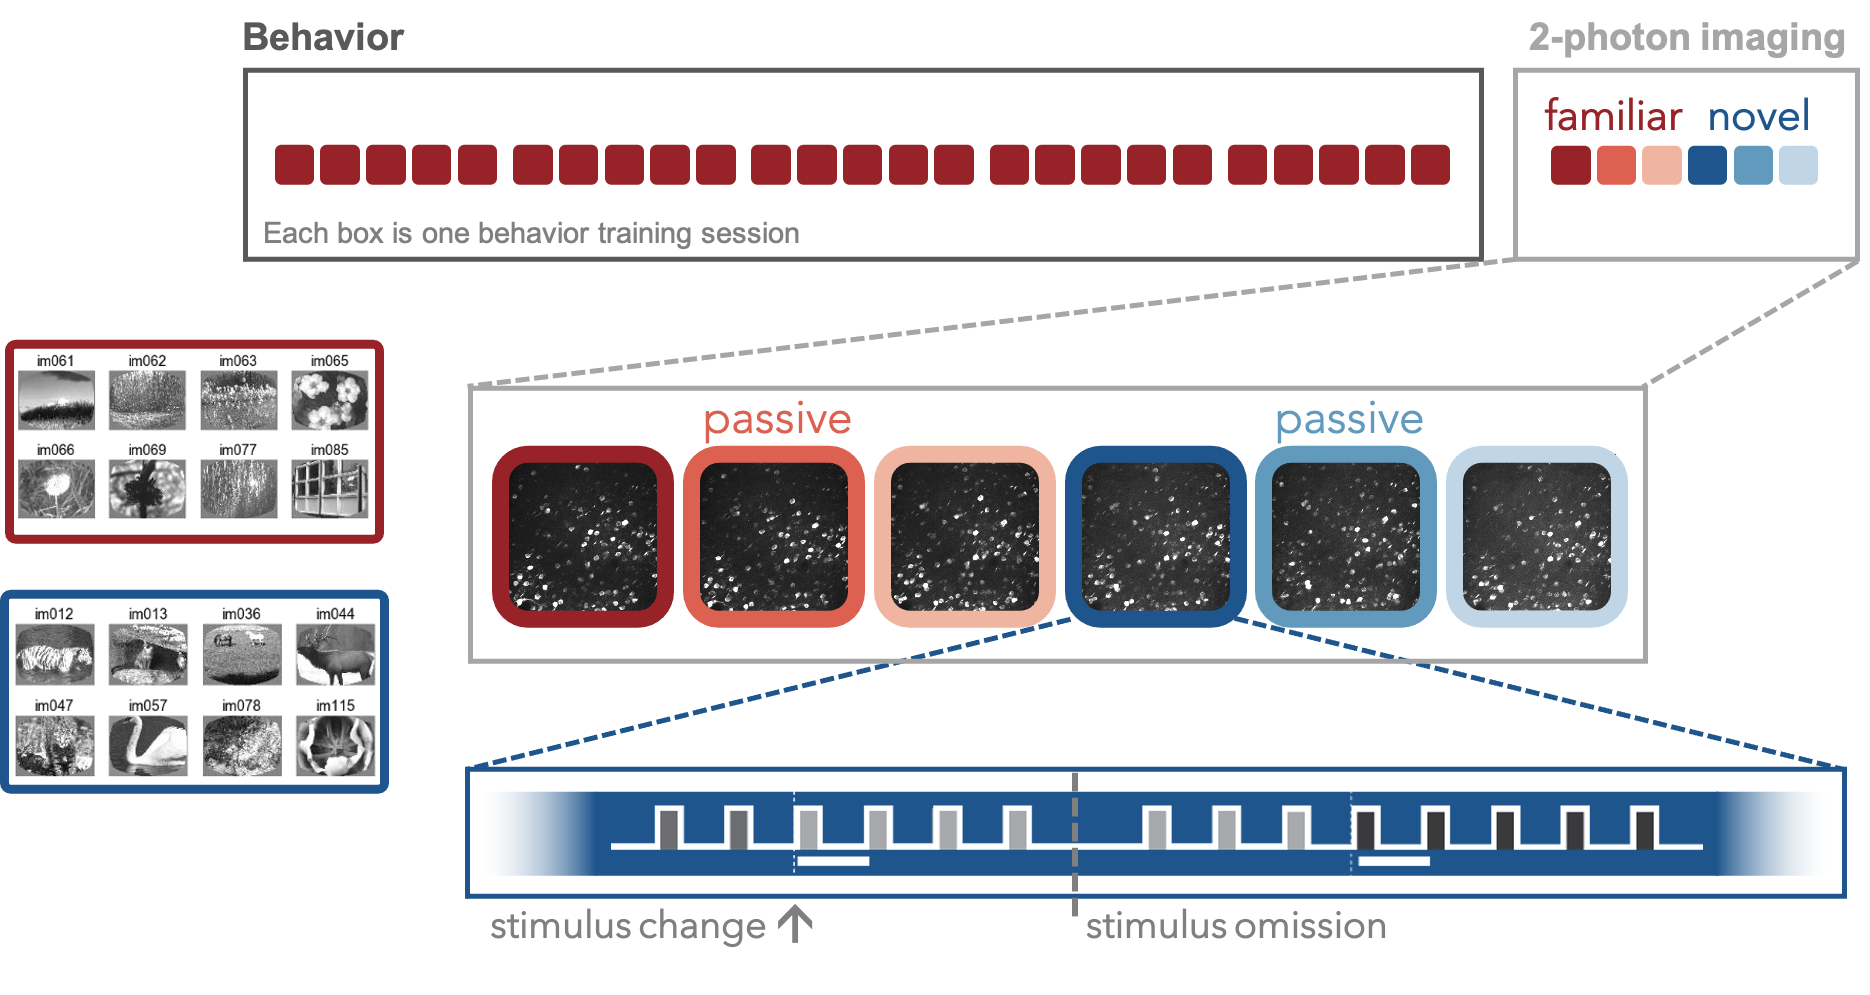

##### Multiple cortical areas and depths were measured concurently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.


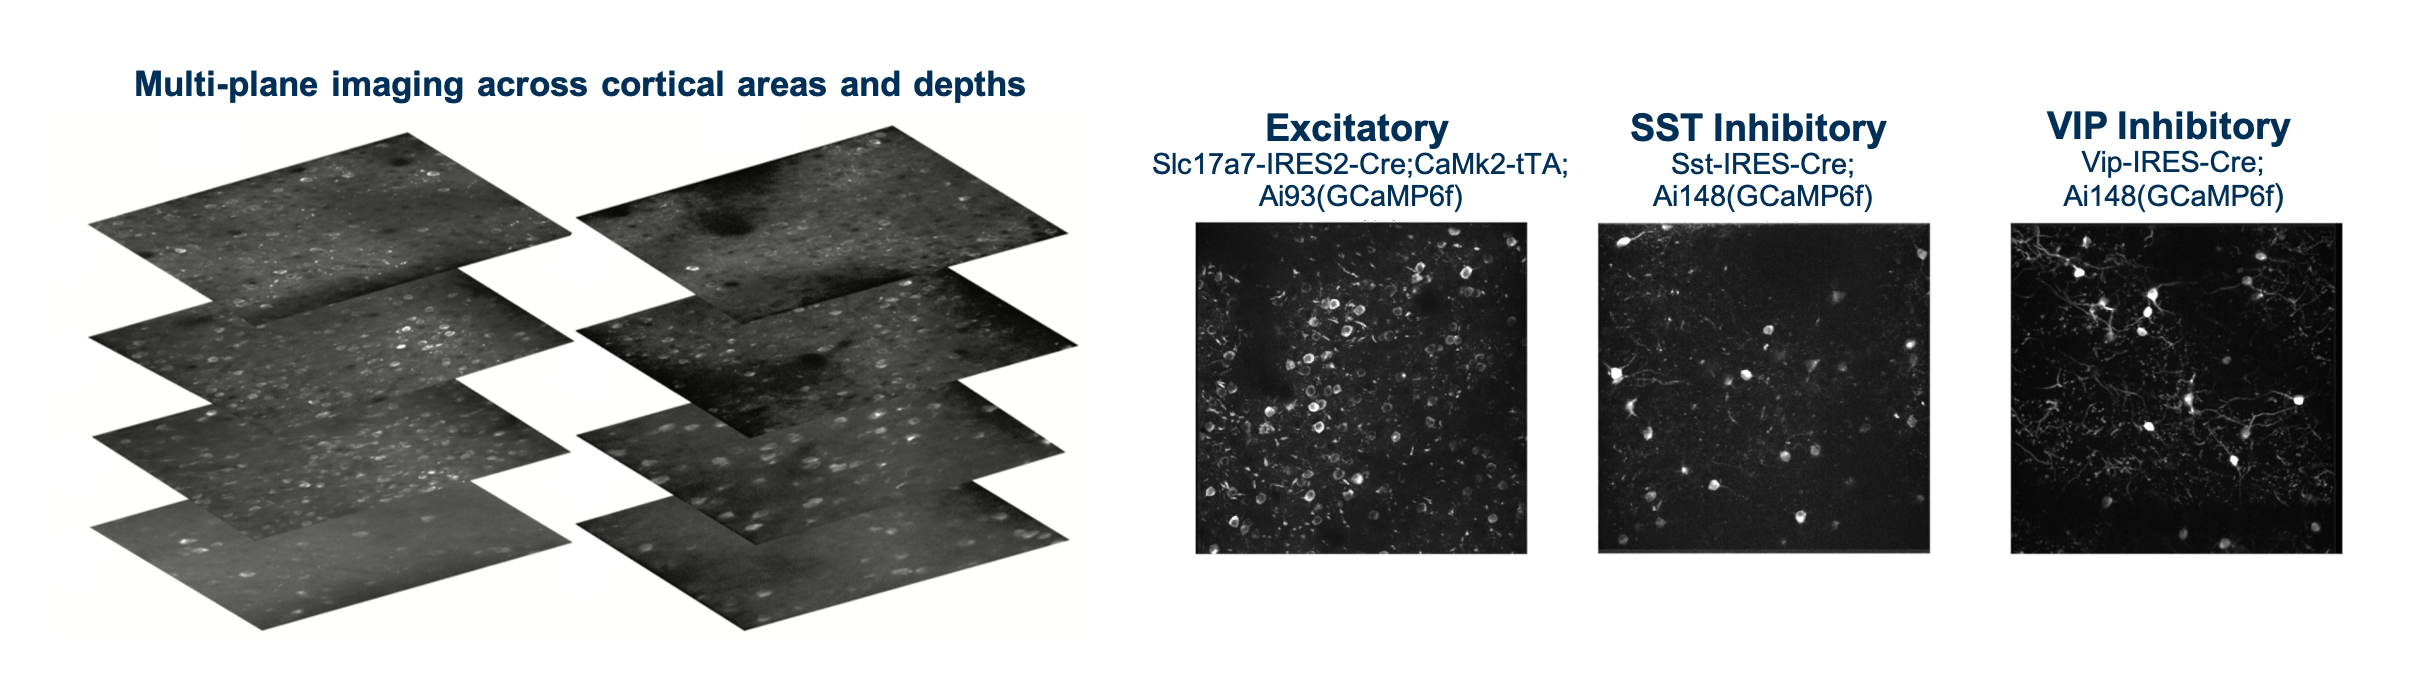

#### This example will focus on the activity of the two inhibitory types - VIP and SST neurons.

# Loading the data

In [2]:
# @title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet
!pip install pyarrow 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## For this example, we have pre-computed event triggered responses and saved them to figshare.
#### To access the full dataset, see `Allen_neuromatch_example_2.ipynb`, or go to the links at the bottom of this notebook
###This cell will download the responses.

In [5]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

### Then we open it using the pandas `read_parquet` method


(parquet is just another file format)

In [6]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

#### The data is organized as a pandas dataframe.
#### Each row contains all data for a given cell on a given trial


In [26]:
data.sample(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
1154887,663,1086563829,"[0.06572844833135605, 0.033615414053201675, 0....","[-1.2281906028244671, -1.1958697974869812, -1....",-0.003856,-0.003583,omitted,8,False,True,...,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar
1428882,1583,1086565528,"[0.03122938983142376, -0.005930265877395868, 0...","[-1.2282367960132226, -1.1959147750655061, -1....",-0.018121,0.020888,omitted,8,False,True,...,1005018474,1000740620,1005032062,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,166.0,novel
1104238,2177,1086668269,"[0.05589839443564415, -0.045113496482372284, -...","[-1.22809559045774, -1.195777285445694, -1.163...",0.001084,-0.032430,omitted,8,False,True,...,1001860744,999191979,1002219417,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,172.0,familiar
631189,3830,1086501038,"[0.02421562559902668, 0.04086548462510109, 0.0...","[-1.2279815442797712, -1.1956662404829352, -1....",-0.042308,-0.011507,omitted,8,False,True,...,993668836,991913246,993691759,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,129.0,novel
539486,2003,1086500839,"[0.12663286924362183, 0.09442431479692459, -0....","[-1.2279363490103425, -1.1956222345627021, -1....",0.026936,0.043021,im073,3,True,False,...,993231283,991913246,993245074,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,127.0,familiar


In [7]:
print("Number of columns before removal:" , len(data.columns))
print("Columns before removal:")
print(data.columns.tolist())      

Number of columns before removal: 31
Columns before removal:
['stimulus_presentations_id', 'cell_specimen_id', 'trace', 'trace_timestamps', 'mean_response', 'baseline_response', 'image_name', 'image_index', 'is_change', 'omitted', 'mean_running_speed', 'mean_pupil_area', 'response_latency', 'rewarded', 'ophys_experiment_id', 'imaging_depth', 'targeted_structure', 'cre_line', 'session_type', 'session_number', 'mouse_id', 'ophys_session_id', 'ophys_container_id', 'behavior_session_id', 'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'sex', 'age_in_days', 'exposure_level']


In [10]:
print("Number of columns before removal:" , len(data.columns))
columns_to_remove = ['imaging_depth', 'targeted_structure', 'sex', 'ages_in_days']
data.drop(columns=columns_to_remove, inplace=True, errors='ignore')

print("\nColumns after removal:")
print(data.columns.tolist())

Number of columns before removal: 31

Columns after removal:
['stimulus_presentations_id', 'cell_specimen_id', 'trace', 'trace_timestamps', 'mean_response', 'baseline_response', 'image_name', 'image_index', 'is_change', 'omitted', 'mean_running_speed', 'mean_pupil_area', 'response_latency', 'rewarded', 'ophys_experiment_id', 'cre_line', 'session_type', 'session_number', 'mouse_id', 'ophys_session_id', 'ophys_container_id', 'behavior_session_id', 'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'age_in_days', 'exposure_level']


In [11]:
unique_image_names = data[data['image_name'].str.startswith('im')]['image_name'].unique()
print("Unique image names starting with 'im':")
print(unique_image_names)

unique_image_count = len(unique_image_names)
print("\nNumber of unique images starting with 'im':", unique_image_count)

Unique image names starting with 'im':
['im075' 'im000' 'im054' 'im035' 'im045' 'im106' 'im073' 'im031' 'im066'
 'im085' 'im062' 'im069' 'im077' 'im063' 'im061' 'im065']

Number of unique images starting with 'im': 16


In [12]:
animal_images = ["im000", "im035", "im045", "im054"]
data['animal_in_image'] = data['image_name'].apply(lambda x: x in animal_images)
print(data[['image_name', 'animal_in_image']].head())


   image_name  animal_in_image
85      im075            False
86      im075            False
87      im075            False
88      im075            False
89      im075            False


In [17]:
close_proximity_images = ["im106", "im075", "im073", "im035", "im065", "im066", "im069"]
data['close_proximity'] = data['image_name'].apply(lambda x: x in close_proximity_images)
print(data[['image_name', 'close_proximity']].head())

   image_name  close_proximity
85      im075             True
86      im075             True
87      im075             True
88      im075             True
89      im075             True


In [21]:
numeric_columns = ['mean_response', 'mean_pupil_area', 'mean_running_speed']

temp_data = data.copy()
temp_data[numeric_columns] = (temp_data[numeric_columns] - temp_data[numeric_columns].mean()) / temp_data[numeric_columns].std()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

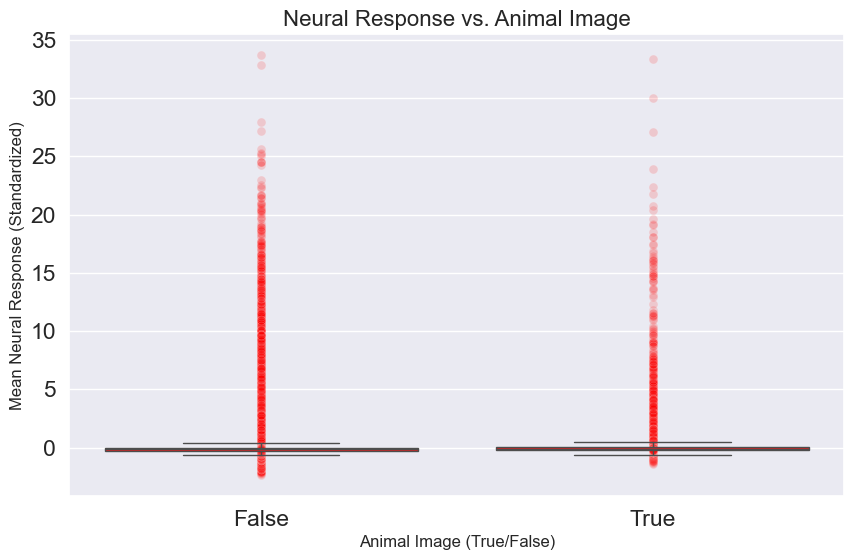

                  count      mean    median       std
animal_in_image                                      
False            121016 -0.015614 -0.158245  0.999329
True              26679  0.070824 -0.096973  0.999999


In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='animal_in_image', y='mean_response', data=temp_data, color='red', showfliers=False)

sns.scatterplot(x='animal_in_image', y='mean_response', data=temp_data, color='red', s=40, alpha=0.15)

plt.title('Neural Response vs. Animal Image', fontsize=16)
plt.xlabel('Animal Image (True/False)', fontsize=12)
plt.ylabel('Mean Neural Response (Standardized)', fontsize=12)

plt.show()

stats = temp_data.groupby('animal_in_image')['mean_response'].agg(['count', 'mean', 'median', 'std'])
print(stats)

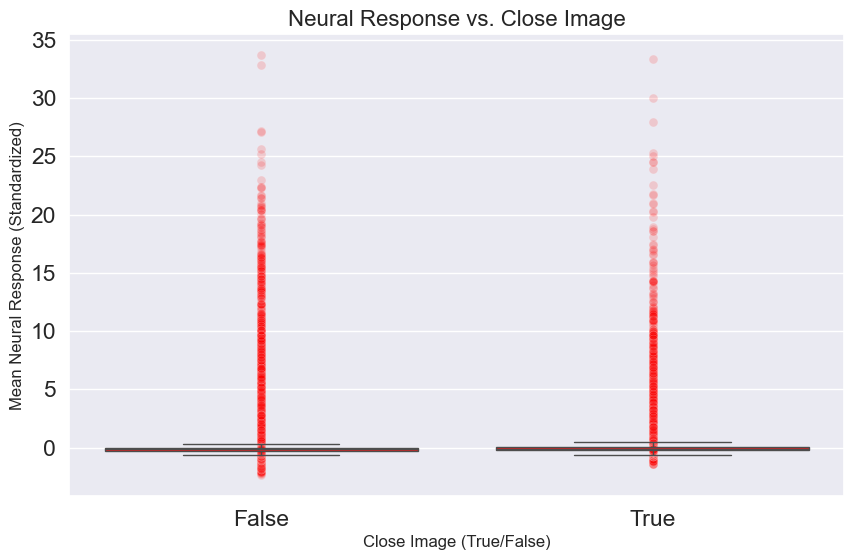

                  count      mean    median       std
close_proximity                                      
False            109010 -0.037703 -0.165523  0.962118
True              38685  0.106242 -0.096398  1.092787


In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='close_proximity', y='mean_response', data=temp_data, color='red', showfliers=False)

sns.scatterplot(x='close_proximity', y='mean_response', data=temp_data, color='red', s=40, alpha=0.15)

plt.title('Neural Response vs. Close Image', fontsize=16)
plt.xlabel('Close Image (True/False)', fontsize=12)
plt.ylabel('Mean Neural Response (Standardized)', fontsize=12)

plt.show()

stats = temp_data.groupby('close_proximity')['mean_response'].agg(['count', 'mean', 'median', 'std'])
print(stats)

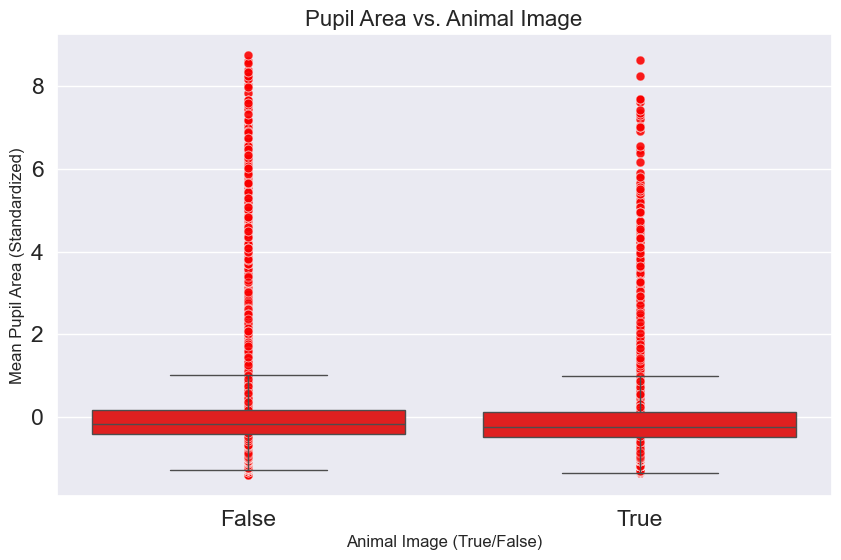

                  count      mean    median       std
animal_in_image                                      
False            117513 -0.003335 -0.182068  0.959303
True              25599  0.015311 -0.237643  1.168676


In [55]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='animal_in_image', y='mean_pupil_area', data=temp_data, color='red', showfliers=False)

sns.scatterplot(x='animal_in_image', y='mean_pupil_area', data=temp_data, color='red', s=40, alpha=0.15)

plt.title('Pupil Area vs. Animal Image', fontsize=16)
plt.xlabel('Animal Image (True/False)', fontsize=12)
plt.ylabel('Mean Pupil Area (Standardized)', fontsize=12)

plt.show()

stats = temp_data.groupby('animal_in_image')['mean_pupil_area'].agg(['count', 'mean', 'median', 'std'])
print(stats)

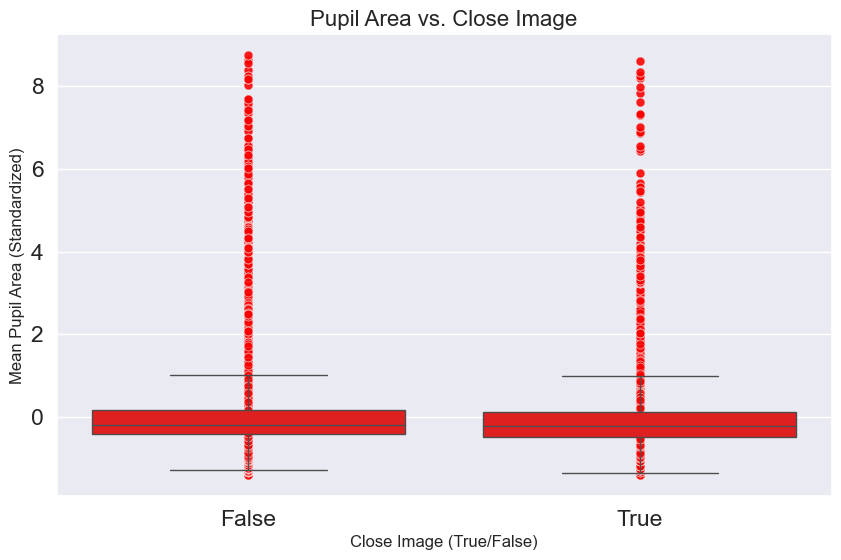

                  count      mean    median       std
close_proximity                                      
False            105436  0.014742 -0.183812  1.002731
True              37676 -0.041255 -0.217639  0.991167


In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='close_proximity', y='mean_pupil_area', data=temp_data, color='red', showfliers=False)

sns.scatterplot(x='close_proximity', y='mean_pupil_area', data=temp_data, color='red', s=40, alpha=0.15)

plt.title('Pupil Area vs. Close Image', fontsize=16)
plt.xlabel('Close Image (True/False)', fontsize=12)
plt.ylabel('Mean Pupil Area (Standardized)', fontsize=12)

plt.show()

stats = temp_data.groupby('close_proximity')['mean_pupil_area'].agg(['count', 'mean', 'median', 'std'])
print(stats)

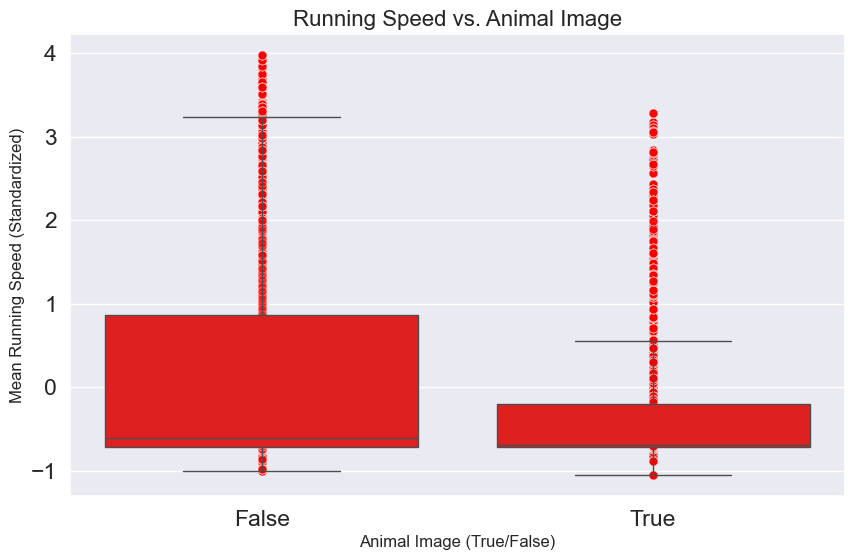

                  count      mean    median       std
animal_in_image                                      
False            121016  0.052523 -0.613171  1.023249
True              26679 -0.238246 -0.697596  0.846986


In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='animal_in_image', y='mean_running_speed', data=temp_data, color='red', showfliers=False)

sns.scatterplot(x='animal_in_image', y='mean_running_speed', data=temp_data, color='red', s=40, alpha=0.15)

plt.title('Running Speed vs. Animal Image', fontsize=16)
plt.xlabel('Animal Image (True/False)', fontsize=12)
plt.ylabel('Mean Running Speed (Standardized)', fontsize=12)

plt.show()

stats = temp_data.groupby('animal_in_image')['mean_running_speed'].agg(['count', 'mean', 'median', 'std'])
print(stats)

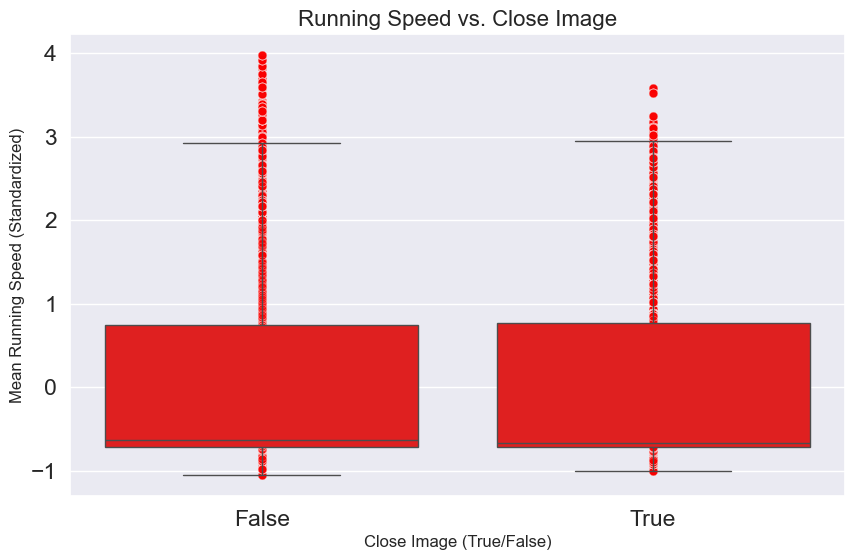

                  count      mean    median       std
close_proximity                                      
False            109010  0.001125 -0.637353  1.002862
True              38685 -0.003169 -0.666483  0.991898


In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='close_proximity', y='mean_running_speed', data=temp_data, color='red', showfliers=False)

sns.scatterplot(x='close_proximity', y='mean_running_speed', data=temp_data, color='red', s=40, alpha=0.15)

plt.title('Running Speed vs. Close Image', fontsize=16)
plt.xlabel('Close Image (True/False)', fontsize=12)
plt.ylabel('Mean Running Speed (Standardized)', fontsize=12)

plt.show()

stats = temp_data.groupby('close_proximity')['mean_running_speed'].agg(['count', 'mean', 'median', 'std'])
print(stats)

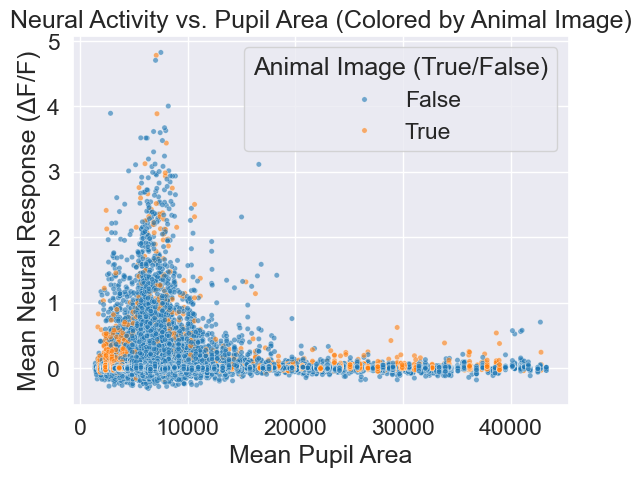

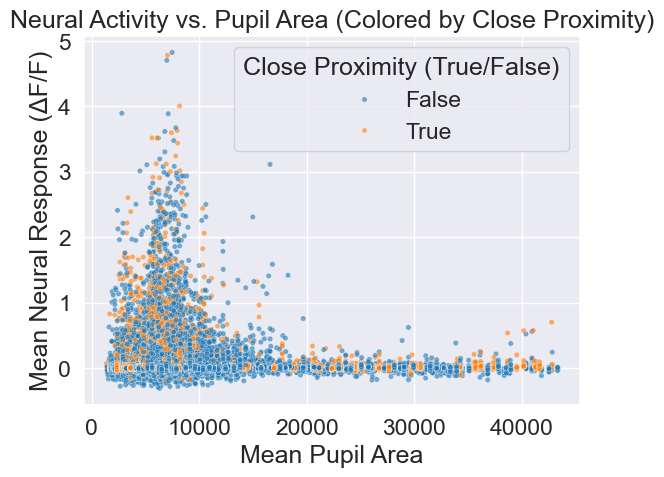

In [62]:
sns.scatterplot(x='mean_pupil_area', y='mean_response', hue='animal_in_image', data=data, s=15, alpha=0.6)
plt.title('Neural Activity vs. Pupil Area (Colored by Animal Image)')
plt.xlabel('Mean Pupil Area')
plt.ylabel('Mean Neural Response (ΔF/F)')
plt.legend(title='Animal Image (True/False)')
plt.show()

sns.scatterplot(x='mean_pupil_area', y='mean_response', hue='close_proximity', data=data, s=15, alpha=0.6)
plt.title('Neural Activity vs. Pupil Area (Colored by Close Proximity)')
plt.xlabel('Mean Pupil Area')
plt.ylabel('Mean Neural Response (ΔF/F)')
plt.legend(title='Close Proximity (True/False)')
plt.show()

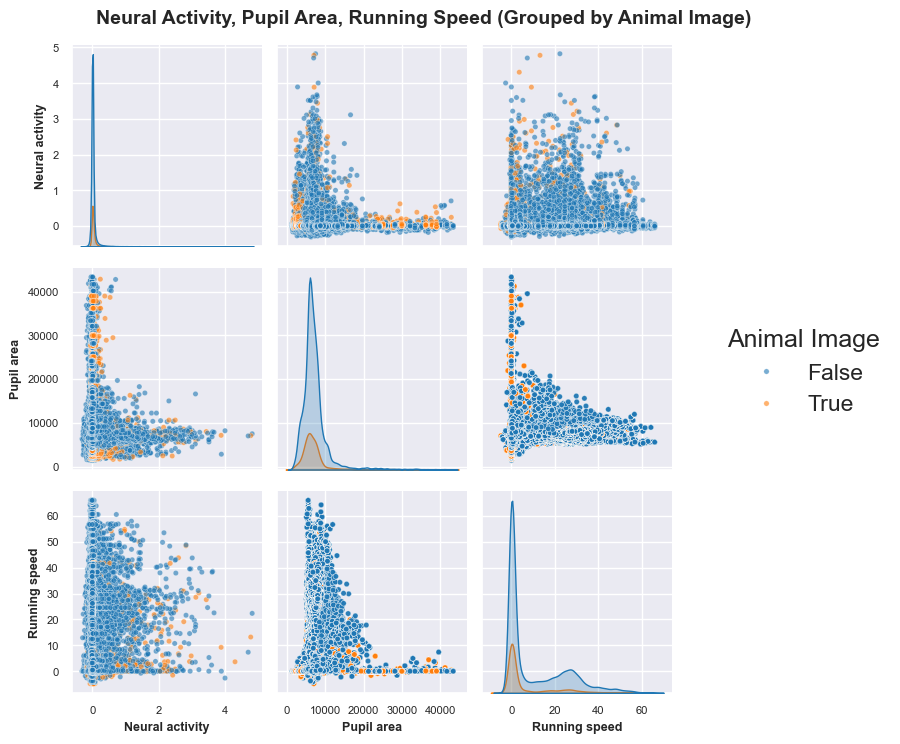

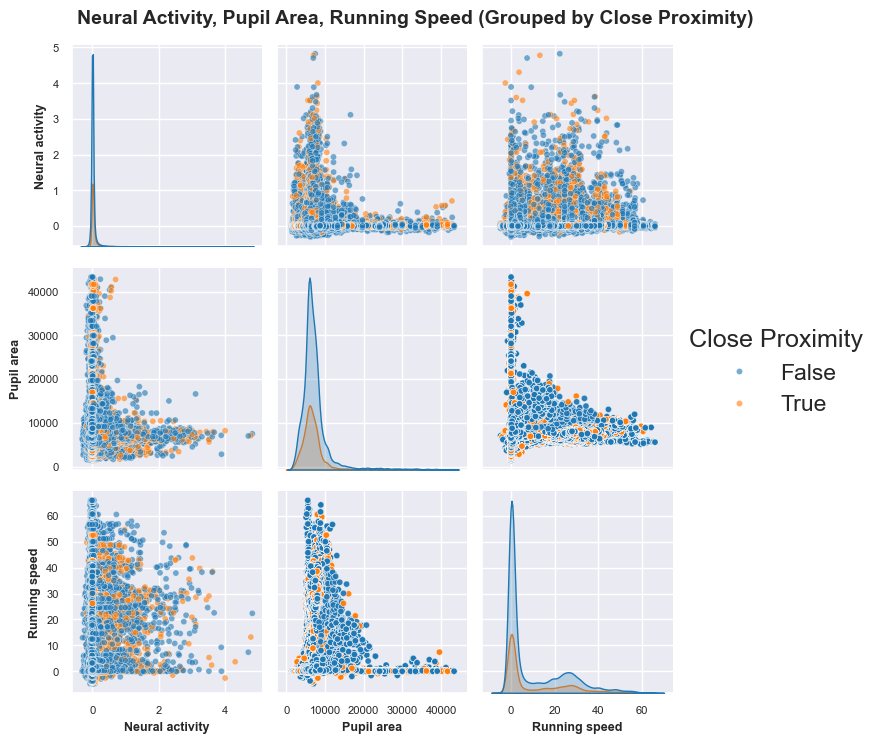

In [80]:
pairplot1 = sns.pairplot(data, 
                         vars=['mean_response', 'mean_pupil_area', 'mean_running_speed'], 
                         hue='animal_in_image',
                         plot_kws={'s': 15, 'alpha': 0.6}) 

plt.suptitle('Neural Activity, Pupil Area, Running Speed (Grouped by Animal Image)', y=1.02, fontsize=14, fontweight='bold')

for ax in plt.gcf().axes:
    if ax.get_xlabel() == 'mean_response':
        ax.set_xlabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_response':
        ax.set_ylabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_pupil_area':
        ax.set_xlabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_pupil_area':
        ax.set_ylabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_running_speed':
        ax.set_xlabel('Running speed', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_running_speed':
        ax.set_ylabel('Running speed', fontsize=9, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=8)
    
pairplot1.legend.set_title('Animal Image')  

plt.show()


pairplot2 = sns.pairplot(data, 
                         vars=['mean_response', 'mean_pupil_area', 'mean_running_speed'], 
                         hue='close_proximity',
                         plot_kws={'s': 20, 'alpha': 0.6}) 

plt.suptitle('Neural Activity, Pupil Area, Running Speed (Grouped by Close Proximity)', y=1.02, fontsize=14, fontweight='bold')

for ax in plt.gcf().axes:
    if ax.get_xlabel() == 'mean_response':
        ax.set_xlabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_response':
        ax.set_ylabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_pupil_area':
        ax.set_xlabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_pupil_area':
        ax.set_ylabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_running_speed':
        ax.set_xlabel('Running speed', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_running_speed':
        ax.set_ylabel('Running speed', fontsize=9, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=8)

pairplot2.legend.set_title('Close Proximity')  

plt.show()


##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




### Let's check what is available


In [12]:
print('exposure_levels:', data.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [13]:
print('stimulus presentations can be changes:', data.is_change.unique())

stimulus presentations can be changes: [ True False]


In [14]:
print('stimulus presentations can be omitted:', data.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [15]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [16]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [17]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset



# How are VIP and SST cells affected by stimulus novelty?

### Plot the population average change response for familiar and novel images for each cre line

Get trials where the image identity changed, for SST and VIP cells

In [12]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

Plot the population average change response of SST cells for familiar and novel images

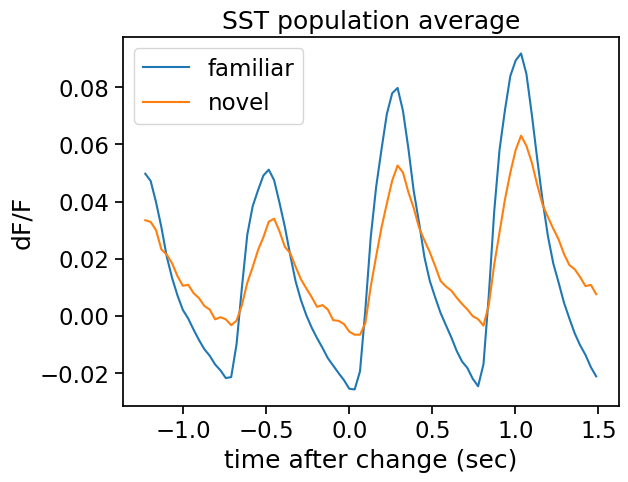

In [13]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot the population average change response of VIP cells for familiar and novel images

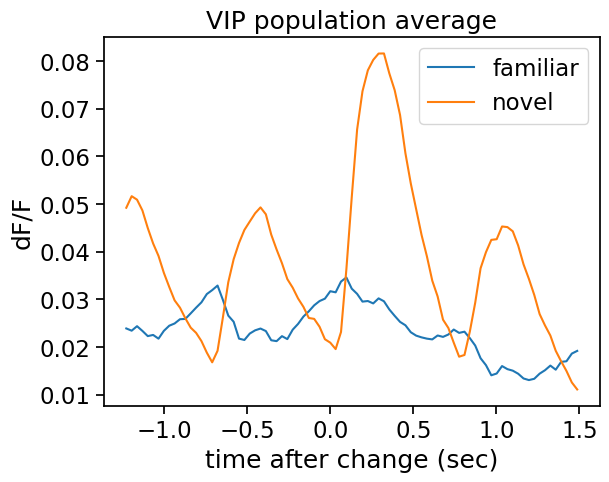

In [14]:
timestamps = vip_data.trace_timestamps.values[0]
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set?

In [15]:
# which cells are in more than one session? make a list
cells_in_multiple_sessions = []
for cell_specimen_id in vip_data.cell_specimen_id.unique():
  if len(vip_data[vip_data.cell_specimen_id == cell_specimen_id].ophys_session_id.unique()) > 1:
    cells_in_multiple_sessions.append(cell_specimen_id)

print(cells_in_multiple_sessions)

[1086495458, 1086495538, 1086495170, 1086495264, 1086496225, 1086495925, 1086495377, 1086496359, 1086496472, 1086496547, 1086496681, 1086497031, 1086496844, 1086500839, 1086500898, 1086500959, 1086501038, 1086501134, 1086501280, 1086501226, 1086501454, 1086501538, 1086501601, 1086501688, 1086489847, 1086489860, 1086489891, 1086558904, 1086556416, 1086555432, 1086559188, 1086555190, 1086567589, 1086559446, 1086567897, 1086558341, 1086556696, 1086561830, 1086557997, 1086559782, 1086560048, 1086567017, 1086557082, 1086556094, 1086563032, 1086563829, 1086560926, 1086561466, 1086562430, 1086560592, 1086566230, 1086566746, 1086563384, 1086562780, 1086565528, 1086497765, 1086498401, 1086498125, 1086499101, 1086498544, 1086498699, 1086498800, 1086498889, 1086498976]


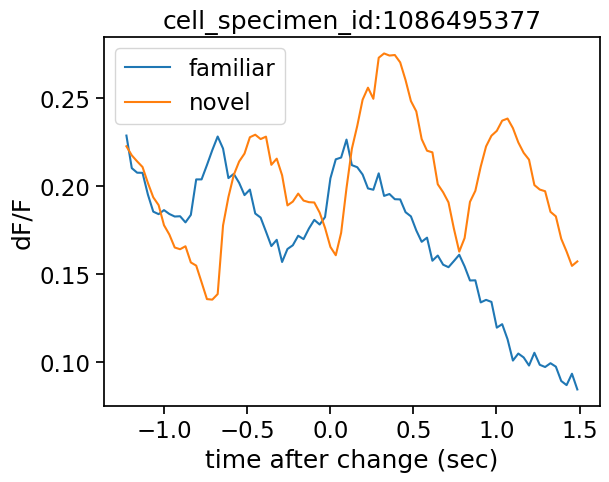

In [16]:
# this one looks like the population average
example_cell_specimen_id = cells_in_multiple_sessions[6]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

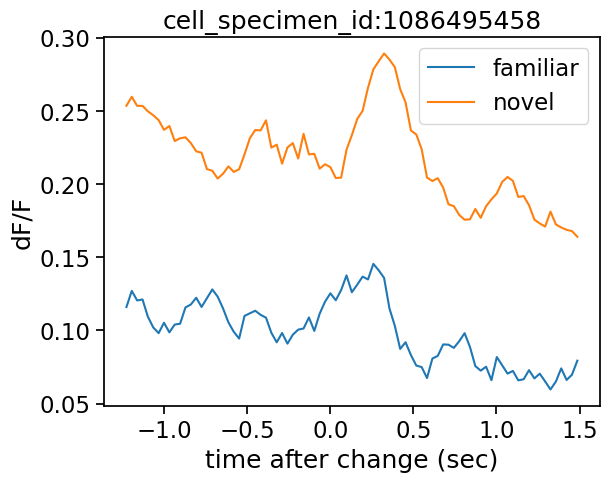

In [17]:
# this one does not look like the population average
example_cell_specimen_id = cells_in_multiple_sessions[0]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### What about trial to trial variability? How does the response of a single cell vary across a session?



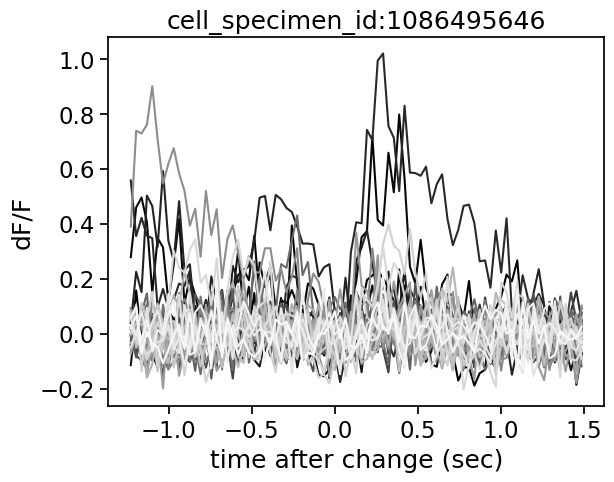

In [18]:
# let's pick a cell from a novel image session
example_cell_specimen_id = vip_data[vip_data.exposure_level=='novel'].cell_specimen_id.unique()[7]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
cell_data = cell_data[(cell_data.image_name == cell_data.image_name.unique()[2])]

offset = 1 / len(cell_data.stimulus_presentations_id.unique())
color = [0, 0, 0]

for i, stimulus_presentations_id in enumerate(cell_data.stimulus_presentations_id.unique()):
  trial_data = cell_data[cell_data.stimulus_presentations_id == stimulus_presentations_id]
  timestamps = trial_data.trace_timestamps.values[0]
  trace = trial_data.trace.values[0]
  plt.plot(timestamps, trace, color = color)
  color = [color[0] + offset, color[1] + offset, color[2] + offset]
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.show()

# How do SST and VIP cells respond when stimuli are omitted?¶

### Plot the population average response to stimulus omission

Get trials where the stimulus was omitted, for SST and VIP cells

In [19]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.omitted == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.omitted == True)]

Plot the population average omission response of SST cells for familiar and novel images

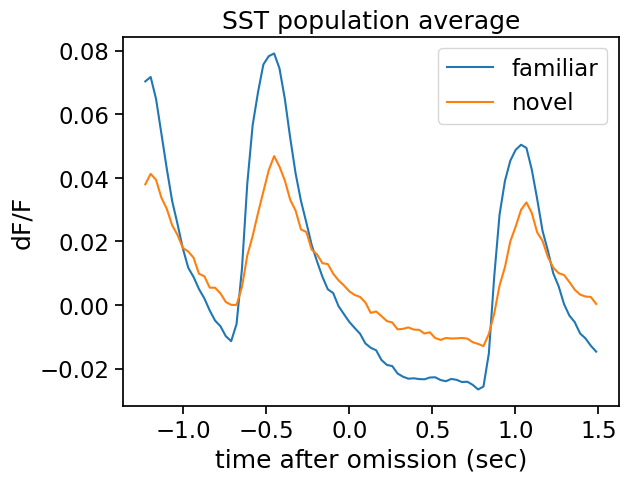

In [20]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot population average omission response of VIP cells for familiar and novel images

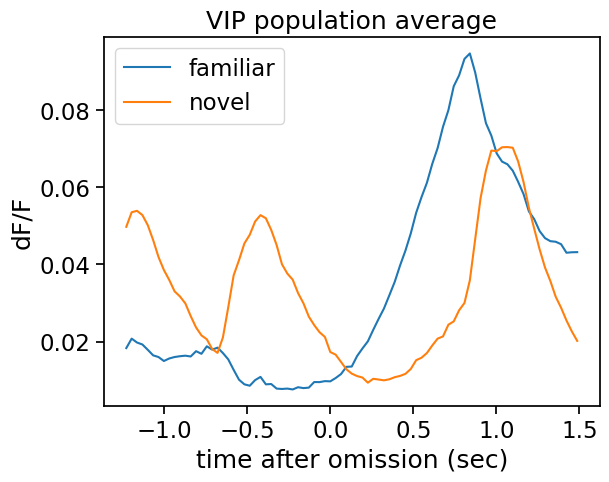

In [21]:
timestamps = vip_data.trace_timestamps.values[0]  # trace timestamps are relative to stimulus onset
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Does the omission response correlate with behavior?

How do the dynamics of image and omission evoked activity change over time during the novel image session?

### To learn how to use the AllenSDK to access the full dataset, and see more in depth examples of how to interact with the data, check out the additional tutorials here:

https://colab.research.google.com/drive/1ACWR4z-B_ODyGWSErmmcKZHJRuqXTwvt?usp=sharing

and in the 'Getting Started' section here:

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html


